## IMPORT LIBRARIES AND DATASET

In [2]:
import pandas as pd
import numpy as np

In [3]:
netflix_df = pd.read_csv('netflix_reviews.csv')

In [4]:
netflix_df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,0858b7bf-a9f1-4daf-b6c0-6daf1d8fe547,Ilekhue kelvin,Why are u guys doing autorenewal,1,0,8.141.1 build 13 51230,2024-12-20 15:50:52,8.141.1 build 13 51230
1,18c177f5-cd6f-4f76-b1a2-fdec4c23790a,Qali Ahmed,I love netflix but ihate that we must pay,2,0,NaN,2024-12-20 15:43:01,NaN
2,7bf0fef2-a0de-4e14-8804-cde42593c333,Sia Kobba,I absolutely love it. Download this app you wo...,4,0,8.103.0 build 8 50614,2024-12-20 15:40:04,8.103.0 build 8 50614
3,e6a81dd3-16da-40c1-b52a-fa7a01e014f1,Mustafa Thaaer,My tablet is Snapdragon 870 with 2k Screen and...,1,0,8.141.1 build 13 51230,2024-12-20 15:32:00,8.141.1 build 13 51230
4,c2e9c859-ffe8-4286-9099-38b6e9c009da,Sibusiso Sigam,Massive,5,0,8.141.1 build 13 51230,2024-12-20 15:31:15,8.141.1 build 13 51230


In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122192 entries, 0 to 122191
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              122192 non-null  object
 1   userName              122190 non-null  object
 2   content               122188 non-null  object
 3   score                 122192 non-null  int64 
 4   thumbsUpCount         122192 non-null  int64 
 5   reviewCreatedVersion  103276 non-null  object
 6   at                    122192 non-null  object
 7   appVersion            103276 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.5+ MB


In [6]:
netflix_df.describe()

,score,thumbsUpCount
count,122192.000000,122192.000000
mean,2.828008,9.787875
std,1.711088,97.886833
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [7]:
netflix_df.describe(include='object')

,reviewId,userName,content,reviewCreatedVersion,at,appVersion
count,122192,122190,122188,103276,122192,103276
unique,121454,88321,119312,595,121850,595
top,ef9bf390-40f4-4c18-8726-fa2246c83a36,A Google user,Good,7.84.1 build 28 35243,2024-05-17 05:21:47,7.84.1 build 28 35243
freq,12,30212,582,1911,3,1911


Check duplicated rows

In [8]:
netflix_df[netflix_df.duplicated()].sort_values(by='reviewId').head(10)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
13372,034aa51e-a591-4559-a5ec-648464d6e7cf,GABRIEL Rublica,Can it be put in Filipino language?🙃,5,0,8.114.0 build 19 50680,2024-05-17 09:43:22,8.114.0 build 19 50680
13459,034aa51e-a591-4559-a5ec-648464d6e7cf,GABRIEL Rublica,Can it be put in Filipino language?🙃,5,0,8.114.0 build 19 50680,2024-05-17 09:43:22,8.114.0 build 19 50680
13380,044865e0-0de1-4a2e-93a1-4ced464f496e,Valon,It's awesome but sometimes it might be a bit s...,4,0,8.114.0 build 19 50680,2024-05-17 08:32:40,8.114.0 build 19 50680
13467,044865e0-0de1-4a2e-93a1-4ced464f496e,Valon,It's awesome but sometimes it might be a bit s...,4,0,8.114.0 build 19 50680,2024-05-17 08:32:40,8.114.0 build 19 50680
13373,0726e2ab-5ca0-470d-b6c5-e685a37ecc6e,Mickael Paris,Good content and UI. I'll be cancelling my sub...,1,0,8.95.2 build 17 50558,2024-05-17 09:39:49,8.95.2 build 17 50558
13460,0726e2ab-5ca0-470d-b6c5-e685a37ecc6e,Mickael Paris,Good content and UI. I'll be cancelling my sub...,1,0,8.95.2 build 17 50558,2024-05-17 09:39:49,8.95.2 build 17 50558
14693,08141c38-e08a-4ae8-88ee-b8919f03d61a,Charles R Harris Jr,#BEWARE ☠️☠️☠️☠️☠️ Netflix has deteriorated to...,1,0,8.113.2 build 27 50674,2024-05-09 06:05:05,8.113.2 build 27 50674
14628,0993f287-c355-4239-b28f-2887eb872e11,Erina Iqbal,faltu,1,0,NaN,2024-05-09 13:44:04,NaN
13481,0aec0bc2-0cf3-4785-8b16-46c1c42e3fb5,Varsha,This household feature wifi doesn't even lets ...,1,0,8.103.0 build 8 50614,2024-05-17 06:17:24,8.103.0 build 8 50614
13510,0bd96dcb-5b57-45a3-b549-c527991bf835,Waliul Islam,Pp k nw.ñ,2,0,NaN,2024-05-17 03:08:52,NaN


In [9]:
# Remove duplicated rows
netflix_df = netflix_df.drop_duplicates()

In [10]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121905 entries, 0 to 122191
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              121905 non-null  object
 1   userName              121903 non-null  object
 2   content               121901 non-null  object
 3   score                 121905 non-null  int64 
 4   thumbsUpCount         121905 non-null  int64 
 5   reviewCreatedVersion  103050 non-null  object
 6   at                    121905 non-null  object
 7   appVersion            103050 non-null  object
dtypes: int64(2), object(6)
memory usage: 8.4+ MB


In [11]:
netflix_df.describe()

,score,thumbsUpCount
count,121905.000000,121905.000000
mean,2.827234,9.810803
std,1.710707,98.000851
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


## PERFORM DATA EXPLORATORY ANALYSIS (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_14250/2482395304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=netflix_df['score'], palette='Set1')


Text(0.5, 1.0, 'Distribution of rating scores')

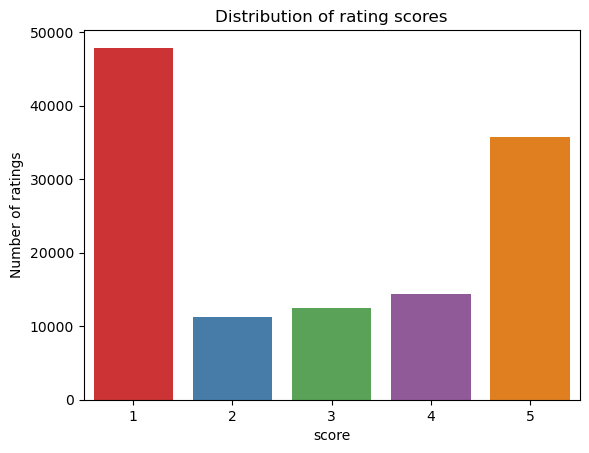

In [13]:
sns.countplot(x=netflix_df['score'], palette='Set1')
plt.ylabel('Number of ratings')
plt.title('Distribution of rating scores')

Text(0.5, 1.0, "Number of people that support the other's reviews")

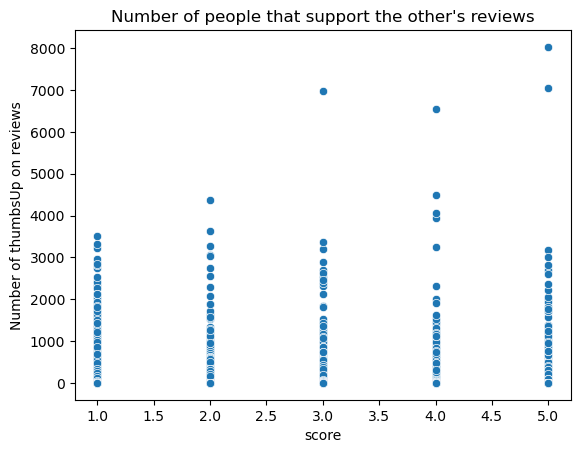

In [14]:
sns.scatterplot(x='score', y='thumbsUpCount', data=netflix_df)
plt.ylabel('Number of thumbsUp on reviews')
plt.title("Number of people that support the other's reviews")

## TIME SERIES DATA ANALYSIS

In [15]:
netflix_df['at'].sort_values()

31754    2018-09-12 07:22:12
65203    2018-09-12 07:33:31
43634    2018-09-12 07:38:21
28007    2018-09-12 07:43:26
64040    2018-09-12 08:07:05
                ...         
4        2024-12-20 15:31:15
3        2024-12-20 15:32:00
2        2024-12-20 15:40:04
1        2024-12-20 15:43:01
0        2024-12-20 15:50:52
Name: at, Length: 121905, dtype: object

In [16]:
netflix_df['at'] = pd.to_datetime(netflix_df['at'])

In [17]:
netflix_df_time_series = netflix_df.copy()  

netflix_df_time_series['month'] = netflix_df_time_series['at'].dt.month
netflix_df_time_series['year'] = netflix_df_time_series['at'].dt.year

Text(0.5, 1.0, 'Number of review from May 2018 to Dec 2024')

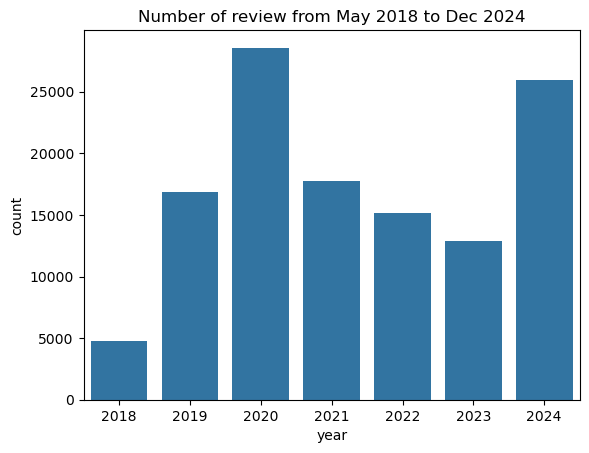

In [18]:
# Plot the bar chart to explore the number of reviews each year
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=netflix_df_time_series['year'])
plt.title('Number of review from May 2018 to Dec 2024')

In [19]:
score_counts = netflix_df_time_series.groupby(['year', 'score']).size().unstack(fill_value=0)

In [20]:
score_counts

score,1,2,3,4,5
year,,,,,
2018,1138,559,690,654,1761
2019,5255,1553,1936,2418,5717
2020,8832,2427,3304,4452,9554
2021,6714,1876,1970,2350,4827
2022,6201,1578,1718,1781,3847
2023,7145,1338,1129,1079,2162
2024,12594,1978,1745,1710,7913


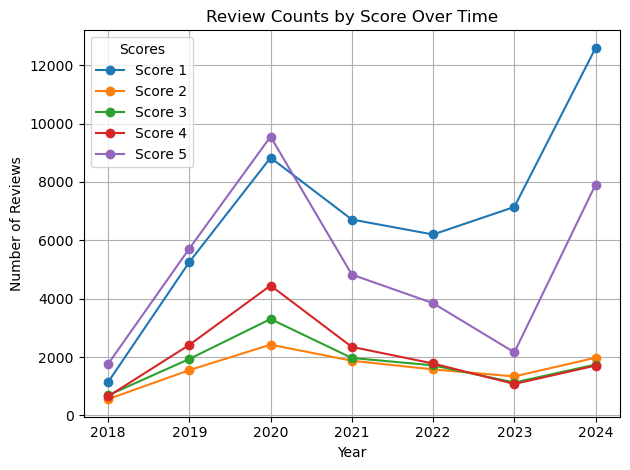

In [21]:
# Create a line chart to compare the review scores from 2018 to 2024
for score in range(1, 6):
    plt.plot(score_counts.index, score_counts[score], label=f'Score {score}', marker='o')

plt.title('Review Counts by Score Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Scores')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
netflix_df_time_series

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,month,year
0,0858b7bf-a9f1-4daf-b6c0-6daf1d8fe547,Ilekhue kelvin,Why are u guys doing autorenewal,1,0,8.141.1 build 13 51230,2024-12-20 15:50:52,8.141.1 build 13 51230,12,2024
1,18c177f5-cd6f-4f76-b1a2-fdec4c23790a,Qali Ahmed,I love netflix but ihate that we must pay,2,0,NaN,2024-12-20 15:43:01,NaN,12,2024
2,7bf0fef2-a0de-4e14-8804-cde42593c333,Sia Kobba,I absolutely love it. Download this app you wo...,4,0,8.103.0 build 8 50614,2024-12-20 15:40:04,8.103.0 build 8 50614,12,2024
3,e6a81dd3-16da-40c1-b52a-fa7a01e014f1,Mustafa Thaaer,My tablet is Snapdragon 870 with 2k Screen and...,1,0,8.141.1 build 13 51230,2024-12-20 15:32:00,8.141.1 build 13 51230,12,2024
4,c2e9c859-ffe8-4286-9099-38b6e9c009da,Sibusiso Sigam,Massive,5,0,8.141.1 build 13 51230,2024-12-20 15:31:15,8.141.1 build 13 51230,12,2024
...,...,...,...,...,...,...,...,...,...,...
122187,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN,8,2019
122188,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250,8,2022
122189,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN,8,2020
122190,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346,7,2019


In [23]:
thumbsup_counts = netflix_df_time_series.groupby('score')['thumbsUpCount'].sum()


In [24]:
thumbsup_counts

score
1    444398
2    179094
3    182546
4    177863
5    212085
Name: thumbsUpCount, dtype: int64

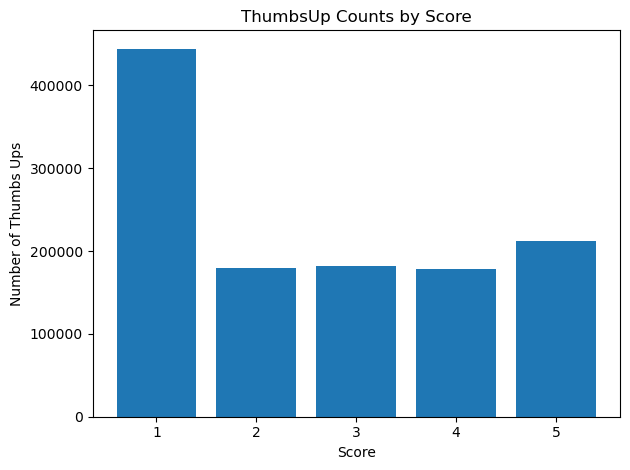

In [25]:
# Create a bar plot for thumbs-up counts for each score
plt.bar(thumbsup_counts.index, thumbsup_counts.values)

plt.title('ThumbsUp Counts by Score')
plt.xlabel('Score')
plt.ylabel('Number of Thumbs Ups')
plt.tight_layout()
plt.show()

In [26]:
netflix_df_time_series['thumbsUpCount'].describe()

count    121905.000000
mean          9.810803
std          98.000851
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8032.000000
Name: thumbsUpCount, dtype: float64

In [27]:
# Display the the max thumbsup vote content

netflix_df_time_series[['content', 'score']][netflix_df_time_series['thumbsUpCount'] == 8032]

,content,score
28076,Wow! To be able to have Netflix on my phone is...,5


In [28]:
# Display the content that is 1 score where Thumbsup count is not zero

filtered_df = netflix_df_time_series[
    (netflix_df_time_series['score'] == 1) & 
    (netflix_df_time_series['thumbsUpCount'] != 0)
].sort_values(by=['thumbsUpCount', 'score'], ascending=[False, True])

filtered_df[['content','thumbsUpCount']].head(5)

,content,thumbsUpCount
18688,The minute I switched the service to include a...,3502
18931,Netflix has been pretty good for me for a long...,3320
18696,The content is fine but the app is horrible an...,3224
18738,"For me, it's finally come time to move on from...",2971
18734,"I love netflix but as of recently, it has been...",2857


In [29]:
grouped_df = filtered_df.groupby('year')['thumbsUpCount'].mean()

# Display the grouped DataFrame
print(grouped_df)

year
2018    13.618529
2019    15.452996
2020    25.645965
2021    26.021674
2022    32.018242
2023    37.659014
2024    20.340501
Name: thumbsUpCount, dtype: float64


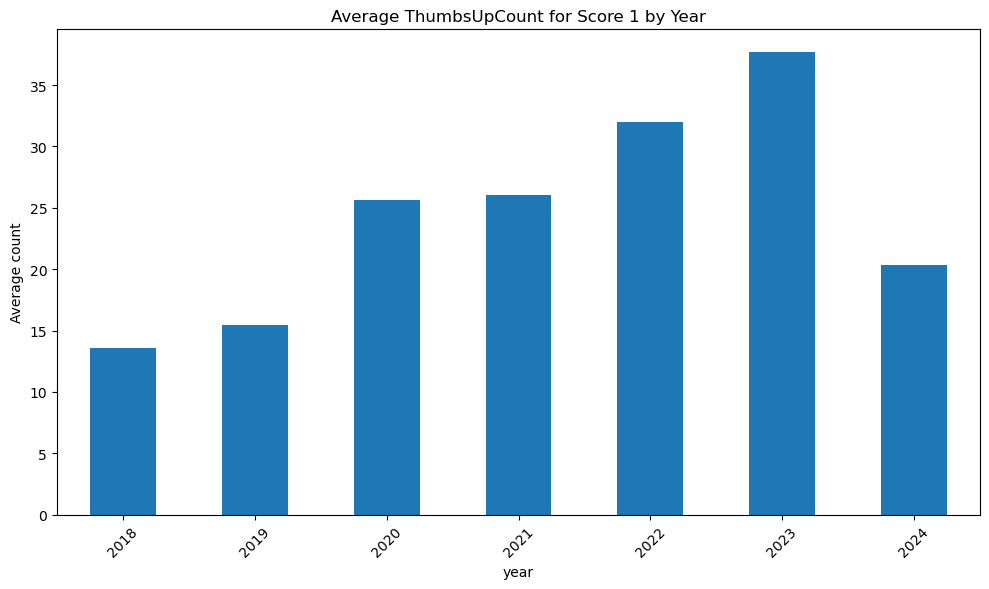

In [30]:
# Plot the bar chart to show avergae thumbsup count by year

filtered_df.groupby('year')['thumbsUpCount'].mean().plot(kind='bar', figsize=(10, 6), title='Average ThumbsUpCount for Score 1 by Year')
plt.ylabel('Average count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Review user by app version
netflix_df_time_series['appVersion'].unique().size

596

In [32]:
netflix_df_time_series['appVersion'].describe()

count                    103050
unique                      595
top       7.84.1 build 28 35243
freq                       1911
Name: appVersion, dtype: object

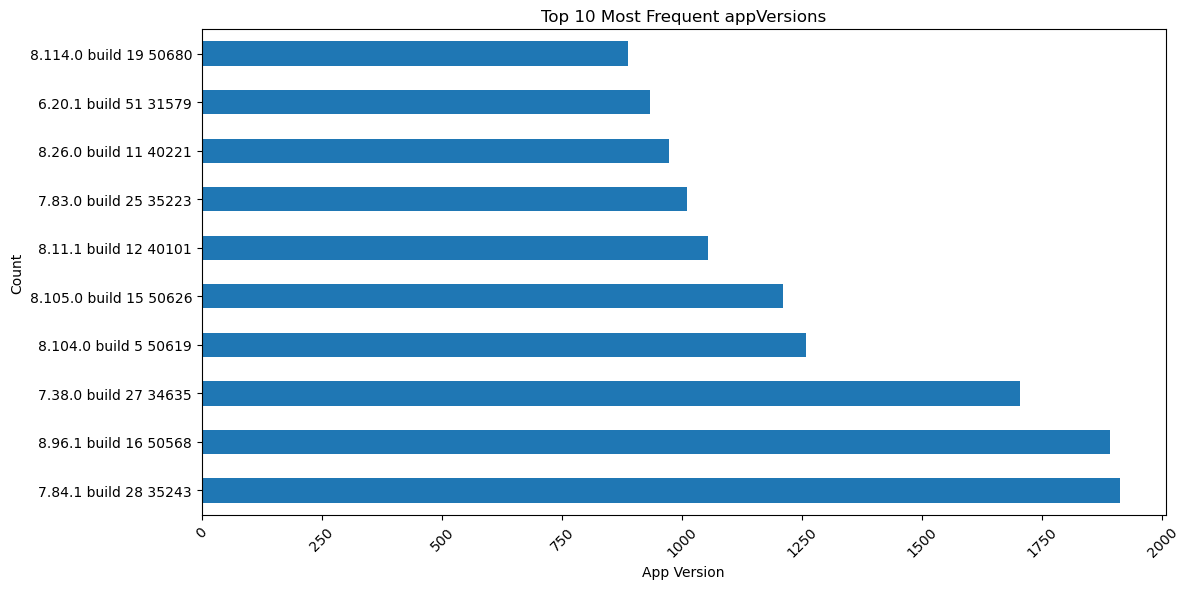

In [33]:
# Count the frequency of each appVersion
version_counts = netflix_df_time_series['appVersion'].value_counts()

# Plot the top 10 most frequent appVersion values
top_versions = version_counts.head(10)
top_versions.plot(kind='barh', figsize=(12, 6), title='Top 10 Most Frequent appVersions')
plt.xlabel('App Version')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


### TIME SERIES DATA ANALYSIS FOR RECENT YEAR 2024

In [35]:
netflix_df_2024 = netflix_df_time_series[netflix_df_time_series['year']== 2024]

In [36]:
#Create new column for content length

netflix_df_2024['content'] = netflix_df_2024['content'].fillna('')  # Replace NaN with empty string
netflix_df_2024['length'] = netflix_df_2024['content'].apply(len)

/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_14250/587332940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_2024['content'] = netflix_df_2024['content'].fillna('')  # Replace NaN with empty string
/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_14250/587332940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_2024['length'] = netflix_df_2024['content'].apply(len)


In [37]:
netflix_df_2024.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,month,year,length
0,0858b7bf-a9f1-4daf-b6c0-6daf1d8fe547,Ilekhue kelvin,Why are u guys doing autorenewal,1,0,8.141.1 build 13 51230,2024-12-20 15:50:52,8.141.1 build 13 51230,12,2024,32
1,18c177f5-cd6f-4f76-b1a2-fdec4c23790a,Qali Ahmed,I love netflix but ihate that we must pay,2,0,NaN,2024-12-20 15:43:01,NaN,12,2024,41
2,7bf0fef2-a0de-4e14-8804-cde42593c333,Sia Kobba,I absolutely love it. Download this app you wo...,4,0,8.103.0 build 8 50614,2024-12-20 15:40:04,8.103.0 build 8 50614,12,2024,60
3,e6a81dd3-16da-40c1-b52a-fa7a01e014f1,Mustafa Thaaer,My tablet is Snapdragon 870 with 2k Screen and...,1,0,8.141.1 build 13 51230,2024-12-20 15:32:00,8.141.1 build 13 51230,12,2024,73
4,c2e9c859-ffe8-4286-9099-38b6e9c009da,Sibusiso Sigam,Massive,5,0,8.141.1 build 13 51230,2024-12-20 15:31:15,8.141.1 build 13 51230,12,2024,7


<Axes: title={'center': "Disribution of the review's text length"}, ylabel='Frequency'>

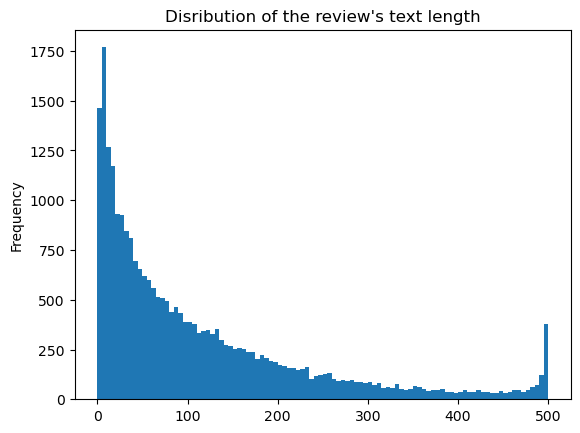

In [38]:
netflix_df_2024['length'].plot(bins=100, kind='hist', title="Disribution of the review's text length")

<Axes: xlabel='score', ylabel='count'>

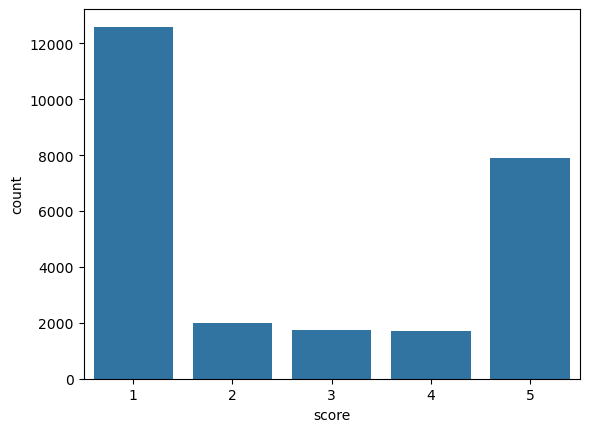

In [39]:
sns.countplot(x=netflix_df_2024['score'])

In [40]:
score_counts_2024 = netflix_df_2024.groupby(['month', 'score']).size().unstack(fill_value=0)

In [41]:
score_counts_2024

score,1,2,3,4,5
month,,,,,
1,1042,192,168,162,321
2,1822,315,213,165,412
3,2029,262,211,195,534
4,1518,245,194,181,607
5,1850,294,281,303,1698
6,924,140,127,138,814
7,5,3,1,3,11
8,794,127,134,132,843
9,5,0,1,0,2


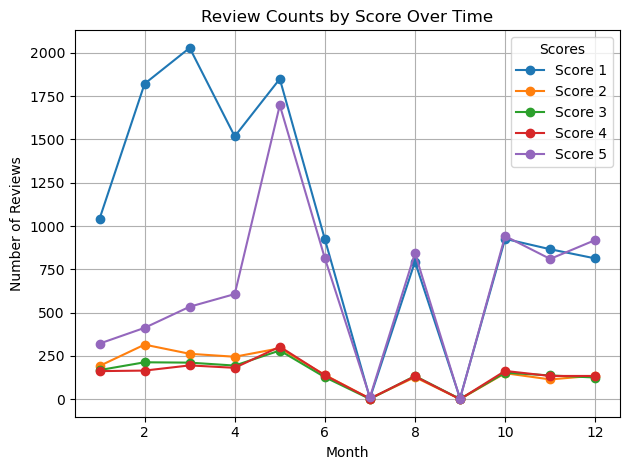

In [42]:
for score in range(1, 6):
    plt.plot(score_counts_2024.index, score_counts_2024[score], label=f'Score {score}', marker='o')

plt.title('Review Counts by Score Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend(title='Scores')
plt.grid(True)
plt.tight_layout()
plt.show()


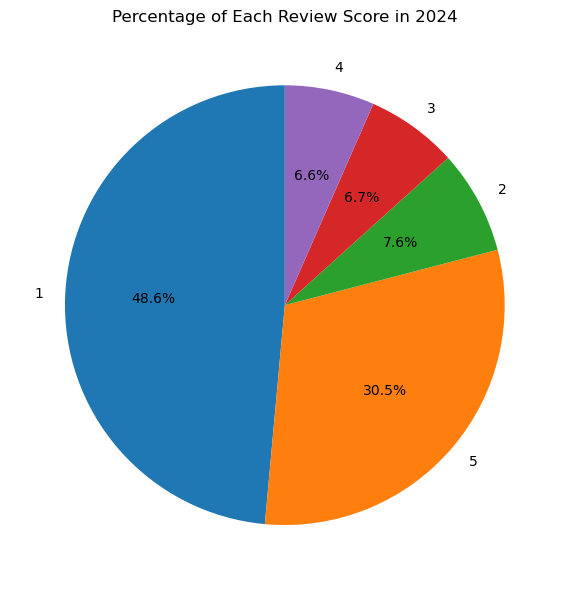

In [43]:
score_counts_2024 = netflix_df_2024['score'].value_counts()

# Distribution of score ratings in 2024
plt.figure(figsize=(8, 6))
plt.pie(score_counts_2024, labels=score_counts_2024.index, autopct='%1.1f%%', startangle=90)

plt.title('Percentage of Each Review Score in 2024')
plt.tight_layout()
plt.show()

## CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS FROM THE CONTENT 

In [44]:
# Create a new column for positive, negative reviews 
# Exclude neutral reviews (score = 3) from the dataset

netflix_df_model = netflix_df_2024[netflix_df_2024['score'] != 3]

def label_sentiment(scores):
    if scores in [1, 2]:
        return 0
    else:
        return 1

netflix_df_model['label'] = netflix_df_model['score'].apply(label_sentiment)

/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_14250/4180112675.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_model['label'] = netflix_df_model['score'].apply(label_sentiment)


In [45]:
netflix_df_model.describe()

,score,thumbsUpCount,at,month,year,length,label
count,24195.000000,24195.000000,24195,24195.000000,24195.0,24195.000000,24195.000000
mean,2.601984,4.488448,2024-06-11 07:03:00.089812224,5.852986,2024.0,111.775739,0.397727
min,1.000000,0.000000,2024-01-01 00:15:11,1.000000,2024.0,0.000000,0.000000
25%,1.000000,0.000000,2024-03-17 07:14:14,3.000000,2024.0,23.000000,0.000000
50%,1.000000,0.000000,2024-05-19 10:06:40,5.000000,2024.0,69.000000,0.000000
75%,5.000000,0.000000,2024-10-07 10:40:14,10.000000,2024.0,158.000000,1.000000
max,5.000000,4502.000000,2024-12-20 15:50:52,12.000000,2024.0,500.000000,1.000000
std,1.839684,65.206897,NaN,3.462694,0.0,119.856203,0.489439


In [46]:
positive = netflix_df_model[netflix_df_model['label'] == 1]
negative = netflix_df_model[netflix_df_model['label'] == 0]

In [47]:
# Import libraries
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aimeetienle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


def content_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [48]:
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)

def content_cleaning(message):
    # Remove punctuation
    message_without_punctuation = ''.join([char for char in message if char not in punctuation_set])
    
    # Split into words and filter out stopwords
    cleaned_message = [
        word for word in message_without_punctuation.split()
        if word.lower() not in stop_words
    ]
    
    return cleaned_message

In [49]:
positive_cleaned = positive['content'].apply(content_cleaning)
negative_cleaned = negative['content'].apply(content_cleaning)

In [50]:
positive_cleaned

2         [absolutely, love, Download, app, wont, regrets]
4                                                [Massive]
5                                                   [nice]
6                                          [exelenet, app]
7                                              [Nice, app]
                                ...                       
122099                [One, year, plan, hota, aacha, hota]
122128                                        [awesome, 😍]
122140                                              [Love]
122156                          [Im, using, Netflix, five]
122170                                  [Im, enjoying, 😎🎧]
Name: content, Length: 9623, dtype: object

In [51]:
positive_cleaned_toplot = [word for sublist in positive_cleaned for word in sublist]
positive_cleaned_toplot = " ".join(positive_cleaned_toplot)

In [52]:
positive_cleaned_toplot[:100]

'absolutely love Download app wont regrets Massive nice exelenet app Nice app good app best films Im '

In [53]:
negative_cleaned_toplot = [word for sublist in negative_cleaned for word in sublist]
negative_cleaned_toplot = " ".join(negative_cleaned_toplot)

In [54]:
negative_cleaned_toplot[:100]

'u guys autorenewal love netflix ihate must pay tablet Snapdragon 870 2k Screen yet Netflix plays SD '

## PLOT THE WORDCLOUD

In [55]:
from wordcloud import WordCloud

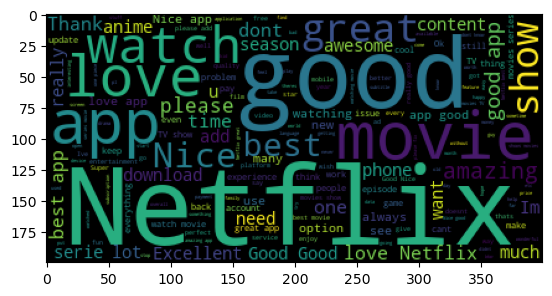

In [56]:
plt.imshow(WordCloud().generate(positive_cleaned_toplot))

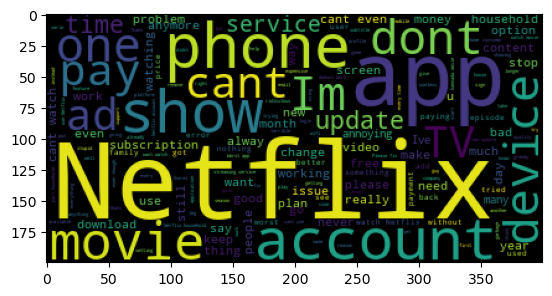

In [57]:
plt.imshow(WordCloud().generate(negative_cleaned_toplot))

## PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
# Define the cleaning pipeline

vectorizer = CountVectorizer(analyzer=content_cleaning, dtype=np.uint8)
netflix_countvectorizer = vectorizer.fit_transform(netflix_df_model['content'])

In [60]:
print(vectorizer.get_feature_names_out())

['0' '000' '00000' ... '🫴🫴' '🫶🏻🫶🏻🫰🏻🫰🏻' '🫶🏽🫶🏽🤌🏽']


In [61]:
print(netflix_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [62]:
netflix_countvectorizer.shape

(24195, 25167)

In [63]:
X = pd.DataFrame(netflix_countvectorizer.toarray())

In [64]:
y = netflix_df_model['label']

## TRAIN AND EVALUATE MODELS

### PERFORM NAIVE BAYES CLASSIFIER MODEL

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [66]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

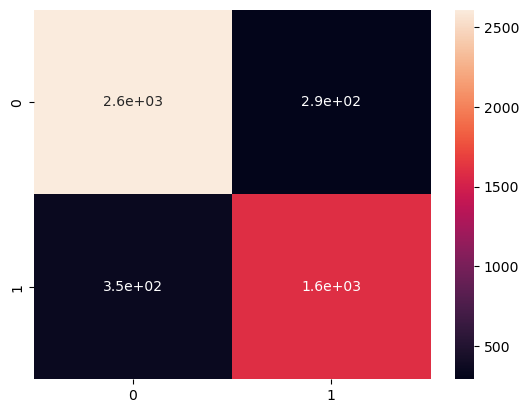

In [67]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [68]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2901
           1       0.85      0.82      0.83      1938

    accuracy                           0.87      4839
   macro avg       0.86      0.86      0.86      4839
weighted avg       0.87      0.87      0.87      4839



### PERFORM LOGISTIC REGRESSION MODEL

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2901
           1       0.85      0.86      0.85      1938

    accuracy                           0.88      4839
   macro avg       0.88      0.88      0.88      4839
weighted avg       0.88      0.88      0.88      4839



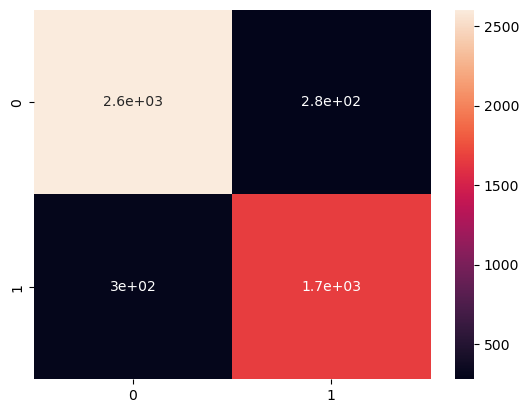

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

### Conclusion

There is a slight improvement in the accuracy of the Logistic Regression model compared to the Naive Bayes model (0.88 vs. 0.87) for predicting whether a review is negative or positive in year 2024, especially as more text is added. The reviews were scored by users through rating stars, which is why the regression model was applied for this study and training purpose.